In [15]:
# import pip

# def install(package):
#     if hasattr(pip, 'main'):
#         pip.main(['install', package])
#     else:
#         pip._internal.main(['install', package])

# # Example
# install('community')

In [16]:
import pandas as pd
import networkx as nx
# import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import collections
import community

In [17]:
df_co = pd.read_csv('df_co_tags_jan_1-21_300test.csv', encoding='utf8')

In [18]:
R = nx.from_pandas_edgelist(df_co,'t_author_id','rt_author_id', edge_attr='CO_tags_words_weight', create_using=nx.Graph()) ##, create_using=nx.DiGraph() ##, create_using=nx.MultiGraph()

In [19]:
rt_count = [i['CO_tags_words_weight'] for i in dict(R.edges).values()]
# labels = [i for i in dict(R.nodes).keys()]
# labels = {i:i for i in dict(R.nodes).keys()}
labels = {e: R.edges[e]['CO_tags_words_weight'] for e in R.edges}

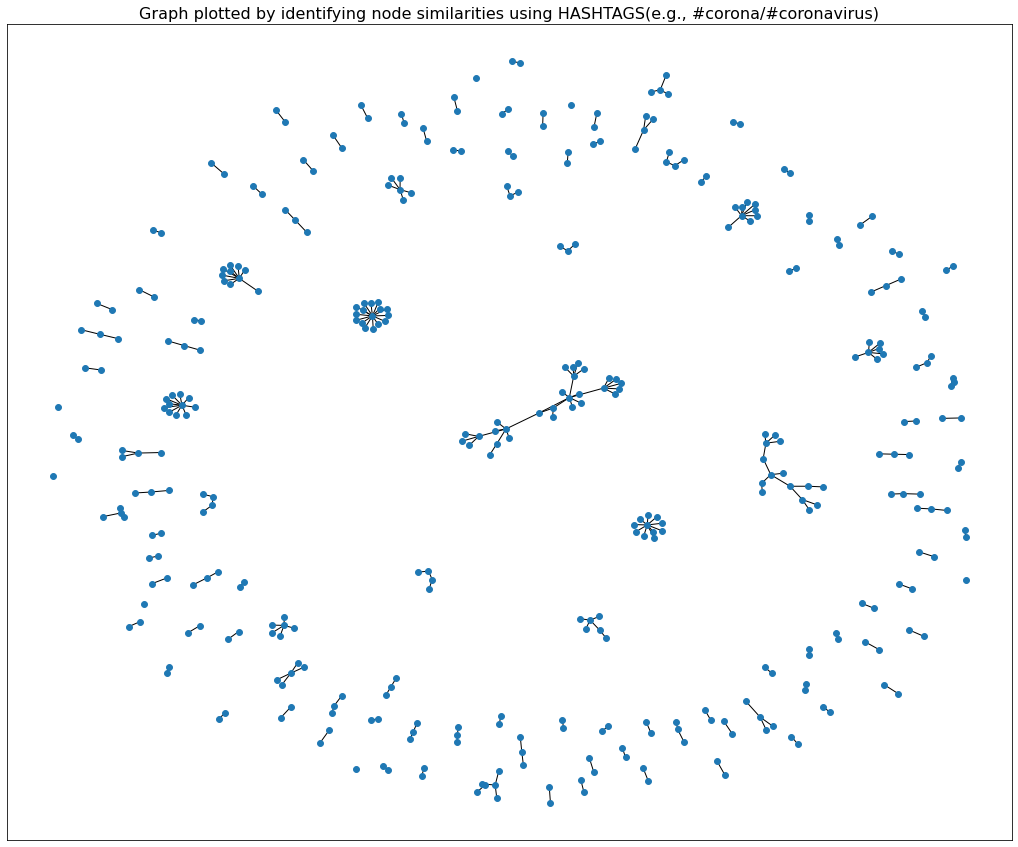

In [26]:
# import community
# import collections

# partition = community.best_partition(R)
# values = [partition.get(node) for node in R.nodes()]
# counter=collections.Counter(values)
# print(counter)

plt.subplots(figsize=(18,15))
sp = nx.spring_layout(R)
nx.draw_networkx(R, pos=sp, with_labels=False, node_size=35)#, node_color=values)
# plt.axes('off')
# fig1 = plt.gcf()
plt.title(label="Graph plotted by identifying node similarities using HASHTAGS(e.g., #corona/#coronavirus)", fontsize=16) ## , color="green"
# fig1 = plt.gcf()
plt.show()
# fig1.savefig('Undirected_net_for_hashtags.png')

Text(0, 0.5, 'number of nodes with degree')

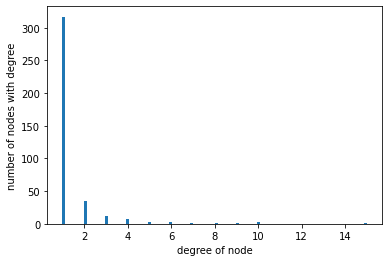

In [43]:
dict_degrees = dict(nx.degree(R))
degree_vals_g1 = dict_degrees.values()
degree_vals_vtx = dict_degrees.keys()
degvals = plt.hist(degree_vals_g1, bins=100)
plt.xlabel('degree of node')
plt.ylabel('number of nodes with degree')

In [44]:
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(R), key=len, reverse=True)
len(communities)

125

In [45]:
##Girvan-Newman Community Detection ## https://orbifold.net/default/community-detection-using-networkx/
result = nxcom.girvan_newman(R)
communities = next(result)
len(communities)

125

In [46]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(R)
# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(R)
# Compute the page rank of G: page_rank
page_rank = nx.pagerank(R)
# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(R)
# Compute the eigenvector centrality of G: clos_cen
# eigen_cen = nx.eigenvector_centrality(R)

print(nx.info(R))

Name: 
Type: Graph
Number of nodes: 383
Number of edges: 274
Average degree:   1.4308


In [47]:
# list(nx.degree(R)) ##G.degree() ##Degree: Measures number of incoming/outgoing connections
sorted(R.degree, key=lambda x: x[1], reverse=True)[0:10] ##Sort graph nodes according to their degree

[(14499829, 15),
 (472783323, 10),
 (1264858705, 10),
 (1443770078, 10),
 (2996527219, 9),
 (146569971, 8),
 (1062265363163795456, 7),
 (726801029963108352, 6),
 (37011196, 6),
 (737362108397060096, 6)]

In [48]:
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:10] ##The degree centrality of a node is simply its degree—the number of edges it has. 
## The higher the degree, the more central the node is. (i.e., the number of ties that a node has)

[(14499829, 0.03926701570680628),
 (472783323, 0.02617801047120419),
 (1264858705, 0.02617801047120419),
 (1443770078, 0.02617801047120419),
 (2996527219, 0.02356020942408377),
 (146569971, 0.020942408376963352),
 (1062265363163795456, 0.018324607329842934),
 (726801029963108352, 0.015706806282722516),
 (37011196, 0.015706806282722516),
 (737362108397060096, 0.015706806282722516)]

In [49]:
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:10] ## The betweenness centrality of a node is an indicator of its centrality or importance in the network. 
## It is described as the number of shortest paths from all the vertices to all the other vertices in the network that pass through the node in consideration (Brandes 2001)

[(472783323, 0.003778977889543912),
 (726801029963108352, 0.0027483475560319357),
 (839210202918449152, 0.002473512800428742),
 (37011196, 0.00171771722251996),
 (14499829, 0.0014428824669167663),
 (1062265363163795456, 0.0014016572535762873),
 (15754217, 0.001071855546852455),
 (75890868, 0.0008932129557103792),
 (869873619551174657, 0.0007008286267881437),
 (1264858705, 0.0006183782001071855)]

In [50]:
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:10] ## The PageRank algorithm measures the importance of each node within the graph, 
## based on the number incoming relationships and the importance of the corresponding source nodes.

[(14499829, 0.01941702390888727),
 (1264858705, 0.013414860390513697),
 (1443770078, 0.013414860390513697),
 (2996527219, 0.012214427686838973),
 (146569971, 0.011013994983164263),
 (472783323, 0.009692097532312838),
 (737362108397060096, 0.008613129575814825),
 (37011196, 0.007467786537503733),
 (925714747, 0.007412696872140113),
 (56077447, 0.007412696872140113)]

In [51]:
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:10] ##Closeness: Measures how quickly (minimum number of steps) can one connect to others in the network

[(14499829, 0.03926701570680628),
 (472783323, 0.03364518067118702),
 (839210202918449152, 0.031096303347612247),
 (726801029963108352, 0.027364746945898778),
 (3317292621, 0.027364746945898778),
 (37011196, 0.026312256678748824),
 (1264858705, 0.02617801047120419),
 (1443770078, 0.02617801047120419),
 (1062265363163795456, 0.0256544502617801),
 (2996527219, 0.02356020942408377)]

In [52]:
# sorted(eigen_cen.items(), key=lambda x:x[1], reverse=True)[0:10] ## Eigenvector: Measures a trader’s connection to those who are highly connected. 
## A person with a high score will be someone who is influencing multiple players (who in turn are highly connected) and is exercising control behind the scenes.

In [53]:
##maximum weighted edge in a networkx
sorted(R.edges(data=True),key= lambda x: x[2]['CO_tags_words_weight'],reverse=True)[:10] ## G.edges(data=True) ##access edges, including their attributes

[(299273962, 364476368, {'CO_tags_words_weight': 1}),
 (299273962, 331202983, {'CO_tags_words_weight': 1}),
 (364476368, 968761746, {'CO_tags_words_weight': 1}),
 (364476368, 364476368, {'CO_tags_words_weight': 1}),
 (1184901201160261632, 311950558, {'CO_tags_words_weight': 1}),
 (179459971, 886029358531358721, {'CO_tags_words_weight': 1}),
 (491461409, 715090785, {'CO_tags_words_weight': 1}),
 (518986948, 39081817, {'CO_tags_words_weight': 1}),
 (135522601, 857589911511281664, {'CO_tags_words_weight': 1}),
 (1143506649606311936, 182898680, {'CO_tags_words_weight': 1})]

In [54]:
sorted(list(nx.all_pairs_shortest_path(R)))##, reverse=True

[(2768501, {2768501: [2768501], 388708143: [2768501, 388708143]}),
 (3362741, {3362741: [3362741], 360611267: [3362741, 360611267]}),
 (6135622,
  {6135622: [6135622],
   2962271415: [6135622, 2962271415],
   1520000839: [6135622, 1520000839],
   3041627797: [6135622, 3041627797],
   1102753514340659200: [6135622, 1102753514340659200]}),
 (7587032,
  {7587032: [7587032],
   1140183523: [7587032, 1140183523],
   24594843: [7587032, 24594843],
   1062839046320332801: [7587032, 1062839046320332801],
   378521012: [7587032, 378521012],
   75890868: [7587032, 1140183523, 75890868],
   869873619551174657: [7587032, 1140183523, 75890868, 869873619551174657],
   1190714023421063180: [7587032, 1140183523, 75890868, 1190714023421063180],
   4627583365: [7587032, 1140183523, 75890868, 4627583365],
   18650514: [7587032, 1140183523, 75890868, 869873619551174657, 18650514],
   1055315125: [7587032, 1140183523, 75890868, 869873619551174657, 1055315125],
   41351727: [7587032, 1140183523, 75890868, 4

In [56]:
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(R), key=len, reverse=True)
len(communities)

125

In [57]:
##Girvan-Newman Community Detection ## https://orbifold.net/default/community-detection-using-networkx/
result = nxcom.girvan_newman(R)
communities = next(result)
len(communities)

125